### COMPONENT ONE: Predicting Customer Spending Behaviour in Streaming Services

How supervised learning models can predict Customer spending and behaviour patterns in streaming services based on information in this dataset?
Apply classification algorithms and unsupervised learning techniques to determine customer churn and identify clustering patterns in customer behaviour.

### Cleaning Data

In [7]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

df = pd.read_csv('Streaming.csv')
print(df)

df.head()
# Check missing values
df.isnull().sum()

df.describe()

     Customer_ID   Age  Gender  Subscription_Length Region Payment_Method  \
0     CUST000001  56.0    Male                   54  South         PayPal   
1     CUST000002  69.0  Female                   21   East     Debit Card   
2     CUST000003  46.0  Female                   49   East         PayPal   
3     CUST000004  32.0    Male                   47   West     Debit Card   
4     CUST000005  60.0    Male                    6   East    Credit Card   
...          ...   ...     ...                  ...    ...            ...   
4995  CUST004996  24.0    Male                    5   East     Debit Card   
4996  CUST004997  66.0  Female                   12   East         PayPal   
4997  CUST004998  26.0  Female                    1   East    Credit Card   
4998  CUST004999  53.0  Female                   44  South     Debit Card   
4999  CUST005000  36.0  Female                   22   East     Debit Card   

      Support_Tickets_Raised  Satisfaction_Score  Discount_Offered  \
0    

,Age,Subscription_Length,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
count,4500.000000,5000.000000,5000.000000,4500.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.582222,29.704400,2.037000,5.54600,12.458404,181.441400,46.619784,0.448000
std,14.969559,17.050336,1.422405,2.86929,4.325381,104.500951,9.522140,0.497338
min,18.000000,1.000000,0.000000,1.00000,5.000000,1.000000,-5.060000,0.000000
25%,31.000000,15.000000,1.000000,3.00000,8.700000,90.000000,39.897500,0.000000
50%,43.000000,29.000000,2.000000,6.00000,12.500000,182.000000,46.625000,0.000000
75%,56.000000,44.000000,3.000000,8.00000,16.190000,271.000000,53.210000,1.000000
max,69.000000,59.000000,9.000000,10.00000,20.000000,364.000000,137.310000,1.000000


In [8]:
# Fill missing values in the 'Age' column with the median age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Function to replace age > 50 with median age
def replace_age(age):
    if age > 50:
        return median_age
    else:
        return age

# Apply the function to the 'Age' column
df['Age'] = df['Age'].apply(replace_age)

# Convert ages to integers to remove decimal points
df['Age'] = df['Age'].astype(int)

# Print unique values in the 'Age' column
print(df['Age'].unique())

# Save the corrected DataFrame to a new file
df.to_csv('Streaming1.csv', index=False)

# change missing values on 0 due to the fact that we unable to predict the score
df['Satisfaction_Score'] = df['Satisfaction_Score'].fillna(str("0"))

# Save the corrected DataFrame to the existing file
df.to_csv('Streaming1.csv', index=False)

df.isnull().sum()

[43 46 32 25 38 36 28 41 20 39 19 50 29 42 44 45 33 24 26 35 21 31 34 23
 27 48 40 18 22 30 49 47 37]


Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64

### (a) Compare regression models that predict "Monthly Spend" based on a single numerical input feature.  
Based on your results, which numerical variable in the dataset is the best predictor of Monthly Spend and why? For each numerical input feature, does Monthly Spend fit better with a linear model or a non-linear model (e.g., polynomial regression)?

Best Predictor of Monthly Spend: Satisfaction_Score
                  Feature        R²      RMSE        MSE
3      Satisfaction_Score  0.369243  7.551213  57.020813
1     Subscription_Length  0.282882  8.051573  64.827829
6                 Churned  0.181645  8.601150  73.979788
4        Discount_Offered  0.044591  9.293519  86.369492
2  Support_Tickets_Raised  0.017760  9.423111  88.795027
5           Last_Activity -0.000999  9.512671  90.490906
0                     Age -0.001267  9.513944  90.515134


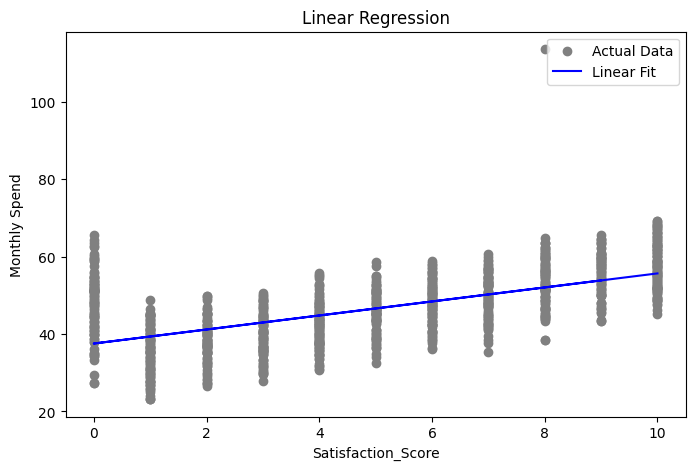

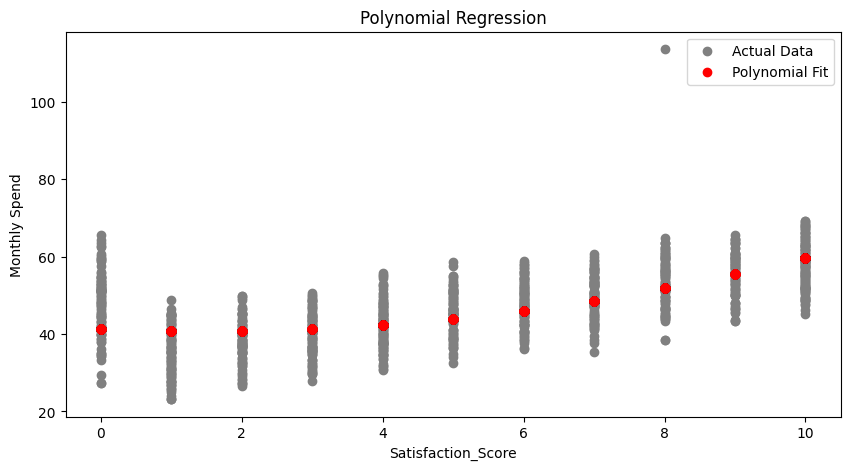

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Streaming1.csv')
# Identify numerical columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Exclude the target variable
numerical_features.remove('Monthly_Spend')

# Store results
results = []

for feature in numerical_features:
    X = df[[feature]]
    y = df['Monthly_Spend']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression Model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)

    results.append({'Feature': feature, 'R²': r2, 'RMSE': rmse, 'MSE': mse})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the best predictor
best_feature = results_df.loc[results_df['R²'].idxmax()]

# Display results
print("Best Predictor of Monthly Spend:", best_feature['Feature'])
print(results_df.sort_values(by='R²', ascending=False))

# Plot the best predictor
best_X = df[[best_feature['Feature']]]
best_y = df['Monthly_Spend']

X_train, X_test, y_train, y_test = train_test_split(best_X, best_y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='gray', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', label='Linear Fit')
plt.xlabel(best_feature['Feature'])
plt.ylabel('Monthly Spend')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(best_X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, best_y, test_size=0.2, random_state=42)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='gray', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='red', label='Polynomial Fit')
plt.xlabel(best_feature['Feature'])
plt.ylabel('Monthly Spend')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

### (b) Consider regression models that take multiple numerical variables as input features to predict "Monthly Spend".  
Does including multiple features improve prediction accuracy
compared to single-variable models from part (a)?

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Streaming1.csv')
features = ['Age', 'Subscription_Length', 'Satisfaction_Score']
X = df[features]
y = df['Monthly_Spend']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multiple regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Multiple Linear Regression MSE: {mse:.4f}")
print(f"Multiple Linear Regression R² Score: {r2:.4f}")
print(f"Multiple Linear Regression RMSE Score: {rmse:.4f}")

Multiple Linear Regression MSE: 30.6625
Multiple Linear Regression R² Score: 0.6608
Multiple Linear Regression RMSE Score: 5.5374


### (c) categorical variables  
In parts (a) and (b), you only considered numerical variables as input. However, several
categorical variables (e.g., Gender, Region, Payment_Method) might also affect Monthly
Spend. Now train a regression model that uses both categorical and numerical variables (e.g.,
a Random Forest Regressor). Does this improve the model’s performance?

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = pd.read_csv('Streaming1.csv')
# numerical and categorical columns
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Exclude the target variable
numerical_features.remove('Monthly_Spend')

X = df[numerical_features + categorical_features]
y = df['Monthly_Spend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

best_r2_numerical_only = 0.6608

if r2 > best_r2_numerical_only:
    print("\nCategorical variables improved performance.")
else:
    print("\nCategorical variables did not improve performance.")

R²: 0.8816
MSE: 10.7062
RMSE: 3.2720

Categorical variables improved performance.


### (d) Artificial Neural Network (ANN) model  
Develop an Artificial Neural Network (ANN) model to predict Monthly Spend based on all
available features in the dataset. How does its performance compare to other supervised
learning models?  
Discuss your neural network architecture, hyperparameter tuning, and
optimization choices.

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │         257,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261,313 (1020.75 KB)

 Trainable params: 261,313 (1020.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1830.4510 - mean_squared_error: 1830.4510 - val_loss: 82.2130 - val_mean_squared_error: 82.2130
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.2413 - mean_squared_error: 87.2413 - val_loss: 42.7279 - val_mean_squared_error: 42.7279
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.9914 - mean_squared_error: 47.9914 - val_loss: 25.9966 - val_mean_squared_error: 25.9966
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.9525 - mean_squared_error: 40.9525 - val_loss: 22.3291 - val_mean_squared_error: 22.3291
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.6054 - mean_squared_error: 32.6054 - val_loss: 19.6978 - val_mean_squared_error: 19.6978
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7963 - mean_squared_error: 23.7963 - val_loss: 18.9368 - val_mean_squared_error: 18.9368
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.2475 - mean_sq

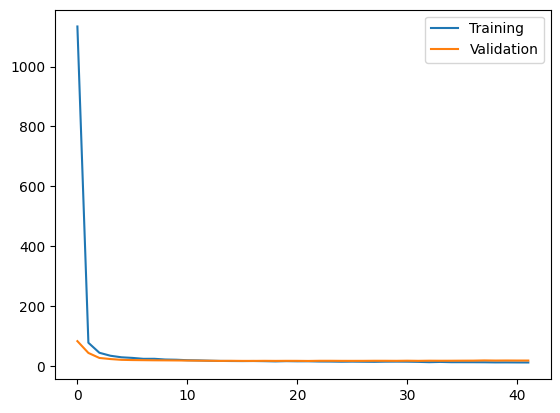

In [94]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Streaming1.csv')
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features.remove('Monthly_Spend')

X = df[numerical_features + categorical_features]
y = df["Monthly_Spend"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

# Determine the input dimension
input_dim = x_train_scaled.shape[1]

# Neural Network Model
model = Sequential()
model.add(Dense(units=64, input_dim=input_dim, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=1, activation="linear"))
model.summary()

# Compile the model
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model
history = model.fit(x_train_scaled, y_train, batch_size=None, epochs=200, verbose="auto", validation_split=0.1, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.flatten()

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plotting the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df["loss"], label="Training")
plt.plot(history_df["val_loss"], label="Validation")
plt.legend()
plt.show()


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 64)                  │         257,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,633 (1.03 MB)

 Trainable params: 269,633 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7399 - mean_squared_error: 9.7399 - val_loss: 17.2566 - val_mean_squared_error: 17.2566
Epoch 2/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.7635 - mean_squared_error: 10.7635 - val_loss: 17.5855 - val_mean_squared_error: 17.5855
Epoch 3/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7393 - mean_squared_error: 9.7393 - val_loss: 17.5613 - val_mean_squared_error: 17.5613
Epoch 4/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2171 - mean_squared_error: 11.2171 - val_loss: 17.0260 - val_mean_squared_error: 17.0260
Epoch 5/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3973 - mean_squared_error: 9.3973 - val_loss: 17.3600 - val_mean_squared_error: 17.3600
Epoch 6/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2901 - mean_squared_error: 9.2901 - val_loss: 17.6039 - val_mean_squared_error: 17.6039
Epoch 7/200
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7140 - mean_squared_error:

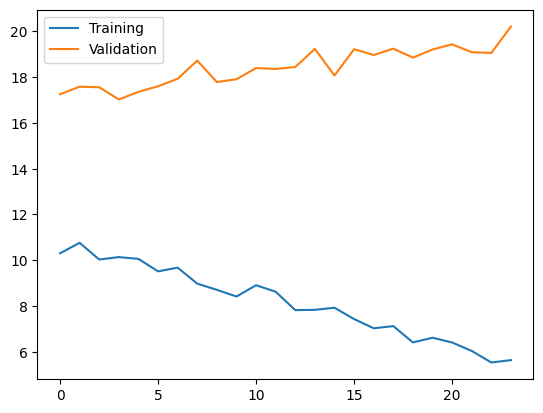

In [95]:
df = pd.read_csv('Streaming1.csv')
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features.remove('Monthly_Spend')

X = df[numerical_features + categorical_features]
y = df["Monthly_Spend"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

# Determine the input dimension
input_dim = x_train_scaled.shape[1]

# Neural Network Model
model2 = Sequential()
model2.add(Dense(units=64, input_dim=input_dim, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 1, activation = "linear"))
model2.summary()

# Compile the model
from keras.optimizers import Adam
adam_optimizer = Adam(learning_rate = 0.01)
model2.compile(adam_optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Train the model
history = model.fit(x_train_scaled, y_train, batch_size=None, epochs=200, verbose="auto", validation_split=0.1, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred = y_pred.flatten()

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plotting the loss
history_df = pd.DataFrame(history.history)
plt.plot(history_df["loss"], label="Training")
plt.plot(history_df["val_loss"], label="Validation")
plt.legend()
plt.show()

### (f) Train, evaluate and compare classification models to predict whether a customer will churn (1) or not churn (0) based on available features.   
Which model performs best, and why? Use
appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC-ROC) to
justify your findings.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_csv('Streaming1.csv')

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Ensure 'Churned' is not in the features list
numerical_features.remove('Churned')

# Define features
X = df[numerical_features + categorical_features]
y = df["Churned"]

def categorize_churn(churn_value):
  if churn_value == 0:
    return "Not Churn"
  elif churn_value == 1:
    return "Churn"
  else:
    return "Invalid Churn Value"

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
ann = MLPClassifier(random_state=42, max_iter=300, early_stopping=True)

# Train models
knn.fit(x_train_scaled, y_train)
decision_tree.fit(x_train_scaled, y_train)
random_forest.fit(x_train_scaled, y_train)
ann.fit(x_train_scaled, y_train)

# Evaluate models
models = {
    "K-Nearest Neighbors": knn,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Artificial Neural Network": ann
}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)

K-Nearest Neighbors:
Accuracy: 0.7770
Precision: 0.7710
Recall: 0.7253
F1 Score: 0.7475
ROC-AUC: 0.7727
------------------------------
Decision Tree:
Accuracy: 0.9900
Precision: 0.9955
Recall: 0.9824
F1 Score: 0.9889
ROC-AUC: 0.9894
------------------------------
Random Forest:
Accuracy: 0.9890
Precision: 0.9805
Recall: 0.9956
F1 Score: 0.9880
ROC-AUC: 0.9895
------------------------------
Artificial Neural Network:
Accuracy: 0.7840
Precision: 0.7537
Recall: 0.7802
F1 Score: 0.7667
ROC-AUC: 0.7837
------------------------------


### (g) Apply the k-Means clustering algorithm to identify different clusters in the streaming service dataset.  

What is the optimal number of clusters (k) and why? Which features produce
the most meaningful clusters? Support your answer with visualizations and evaluation metrics.

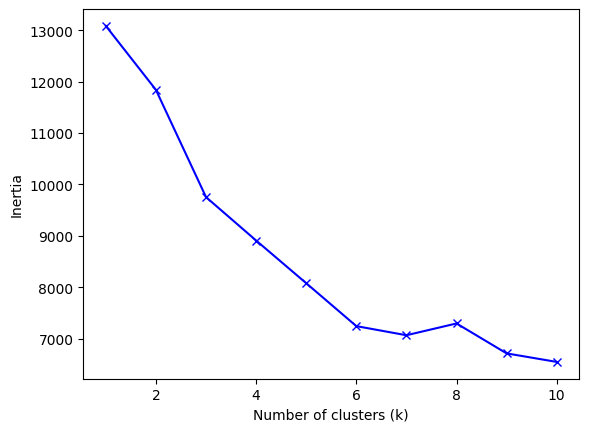

In [17]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

df = pd.read_csv('Streaming1.csv')
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove from features
categorical_features.remove('Customer_ID')

X = df[numerical_features + categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Standardize the preprocessed data
scaler = StandardScaler(with_mean=False)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

[1 0 3 ... 5 0 0]


<Axes: xlabel='Satisfaction_Score', ylabel='Monthly_Spend'>

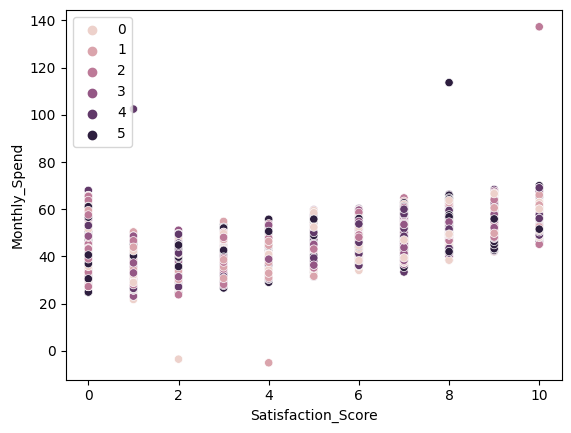

In [18]:
optimal_k = 6

# Fit the final K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_preprocessed)

# Predict the cluster labels for each data point
cluster_labels_pred = kmeans.predict(X_preprocessed)

# Print the predicted cluster labels
print(cluster_labels_pred)

sns.scatterplot(data=df, x='Satisfaction_Score', y='Monthly_Spend', hue=cluster_labels_pred)

### (h) Compare the k-Means clustering results from part (g) with another clustering algorithm (e.g., Hierarchical Clustering or DBSCAN).  
Which algorithm provides the best segmentation
of customer behaviour, and why? Use evaluation metrics to justify your answer.

In [19]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

db_score = davies_bouldin_score(X_preprocessed, cluster_labels_pred)
s_score = silhouette_score(X_preprocessed, cluster_labels_pred)

print("Davies Bouldin Index: %.4f" % (db_score, ))
print("Silhouette Coefficient: %.4f" % (s_score, ))

Davies Bouldin Index: 1.6985
Silhouette Coefficient: 0.2429


Hierarchical Clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
# Create an instance of the AgglomerativeClustering class, with 3 clusters and complete linkage.
agg_model = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
# We can now fit this model to our dataset. The following will both fit the model and output the predicted cluster labels
agg_labels_pred = agg_model.fit_predict(X_preprocessed)
print(agg_labels_pred)

db_score = davies_bouldin_score(X_preprocessed, agg_labels_pred)
s_score = silhouette_score(X_preprocessed, agg_labels_pred)

print("Davies Bouldin Score: %.4f" % (db_score, ))
print("Silhouette Score: %.4f" % (s_score, ))

[0 3 3 ... 3 5 3]
Davies Bouldin Score: 2.2329
Silhouette Score: 0.1274
